In [2]:
import re, os
import pandas as pd

def extract_gleason_score(text):
    print(text)
    if text.lower() == "benign":
        return 0
    else:
        match = re.search(r'Gleason Score (\d\+\d)', text)
        return match.group(1) if match else None


data_dir = "/data/jjiang10/Data/ProstatePathology/dataset/PRAD"
# Load DataFrame from CSV
df = pd.read_csv(os.path.join(data_dir, "PRAD.csv"))

df["edited_label"] = df["label"].apply(extract_gleason_score)

# Save the updated DataFrame to a new CSV file
df.to_csv(os.path.join(data_dir,"PRAD_label_edited.csv"), index=False)



Gleason Score 5+4
Gleason Score 3+4
Gleason Score 4+3
Gleason Score 4+3
Gleason Score 4+3
Gleason Score 4+3 with Minor 5
Gleason Score 4+3 with Minor 5
Gleason Score 3+4
Gleason Score 5+4
Gleason Score 4+3
Gleason Score 3+3 with Minor 4
Gleason Score 3+3
Gleason Score 4+3 with Minor 5
Gleason Score 5+4
Gleason Score 3+3
Gleason Score 4+3
Gleason Score 4+3 with Minor 5
Gleason Score 5+3
Gleason Score 5+3
Gleason Score 5+4
Gleason Score 4+3
Gleason Score 4+3 with Minor 5
Gleason Score 4+3
Gleason Score 4+3 with Minor 5
Gleason Score 3+4 with Minor 5
Gleason Score 4+4 with Minor 5
Gleason Score 4+3
Gleason Score 5+5
Gleason Score 5+4
Gleason Score 3+4
Gleason Score 3+4
Gleason Score 4+3
Gleason Score 4+5
Gleason Score 4+4 with Minor 5
Gleason Score 4+4 with Minor 5
Gleason Score 4+5
Gleason Score 4+3 with Minor 5
Gleason Score 3+4 with Minor 5
Gleason Score 4+3 with Minor 5
Gleason Score 3+3
Gleason Score 3+4
Gleason Score 4+3
Gleason Score 4+3 with Minor 5
Gleason Score 4+3 with Minor 5


In [3]:
SIMPLER_MAPPING = True
SIMPLER_ADD_MAPPING = True
df = pd.read_csv(os.path.join(data_dir,"PRAD_label_edited.csv"))

# Create a mapping of unique values to index, 
if SIMPLER_ADD_MAPPING:
    unique_values = list(set(df['edited_label'].apply(lambda x: eval(x)))) # e.g "5+4", calculate sum, get "9"
    print(unique_values)
elif SIMPLER_MAPPING:
    unique_values = list(set(df['edited_label'].str[0])) # e.g "5+4", use only the first number, get "5"
else:
    unique_values = list(set(df['edited_label'])) # use both number 
print(unique_values)
mapping = {value: index for index, value in enumerate(unique_values)}
print(mapping)
# Create a new column based on the mapping
if SIMPLER_ADD_MAPPING:
    df['slide_label'] = df['edited_label'].apply(lambda x: eval(x)).map(mapping) # e.g "5+4", calculate sum, get "9"
elif SIMPLER_MAPPING:
    df['slide_label'] = df['edited_label'].str[0].map(mapping)
else:
    df['slide_label'] = df['edited_label'].map(mapping)

# mapping: {0: 0, 6: 1, 7: 2, 8: 3, 9: 4, 10: 5}
# 0: benign; 1: low risk; 2: medim risk; 3: high risk (score>7)
df['slide_label'] = df['slide_label'].apply(lambda x: 3 if x > 3 else x)


df.to_csv(os.path.join(data_dir,"slide_label_PRAD_label_edited.csv"), index=False)
print(df)


[0, 6, 7, 8, 9, 10]
[0, 6, 7, 8, 9, 10]
{0: 0, 6: 1, 7: 2, 8: 3, 9: 4, 10: 5}
                                      data_profile_uri  \
0    https://data.codatta.io/eb00cbed-63c4-4d47-9b6...   
1    https://data.codatta.io/cfe0818a-1baf-407f-a43...   
2    https://data.codatta.io/c6754722-a9ca-49c6-bd7...   
3    https://data.codatta.io/9f8bf716-57fa-40aa-b00...   
4    https://data.codatta.io/363957ce-7840-4c54-990...   
..                                                 ...   
133  https://data.codatta.io/b8356b56-8b39-493e-85d...   
134  https://data.codatta.io/2947c6b1-428a-457c-b8d...   
135  https://data.codatta.io/0ffe9d75-5c85-4ccc-b79...   
136  https://data.codatta.io/a5ce0375-b077-4dfa-857...   
137  https://data.codatta.io/ad9bd00e-2d64-4357-813...   

                                 slide_id  \
0    eb00cbed-63c4-4d47-9b6a-9dde1306b8cd   
1    cfe0818a-1baf-407f-a43d-373725e3e581   
2    c6754722-a9ca-49c6-bd71-3188fd5068d6   
3    9f8bf716-57fa-40aa-b003-c2410796b92a   


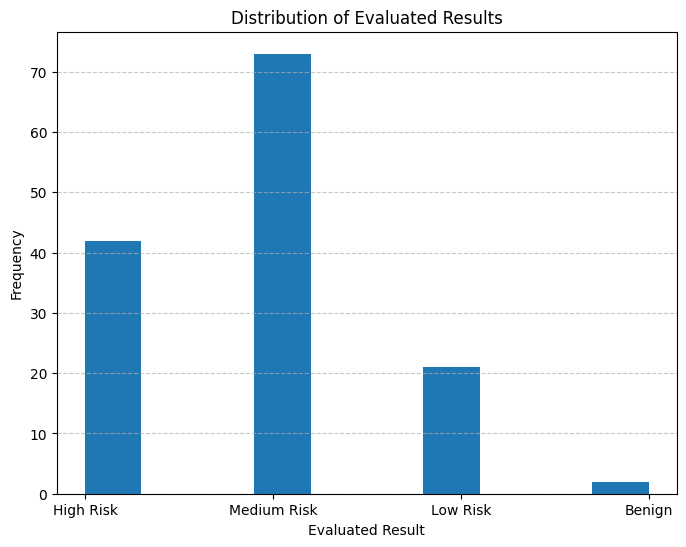

In [15]:
import matplotlib.pyplot as plt
# Plot statistics of the evaluated results
plt.figure(figsize=(8, 6))
# ax = df['slide_label'].plot(kind='hist', bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Evaluated Result')
# Set custom x-tick labels
dict_label = {0: "Benign", 1: "Low Risk", 2: "Medium Risk", 3: "High Risk"}
n, bins, patches = plt.hist(df['slide_label'].map(dict_label))
# plt.xticks(bins)
# plt.xticklabels()

plt.ylabel('Frequency')
plt.title('Distribution of Evaluated Results')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()